# **Final Project Task 3 - Census Modeling Regression**

Requirements

Create a regression model on the Census dataset, with 'hours-per-week' target

You can use models (estmators) from sklearn, but feel free to use any library for traditional ML.

Note: in sklearn, the LinearRegression estimator is based on OLS, a statistical method. Please use the SGDRegressor estimator, since this is based on gradient descent.
You can use LinearRegression estimator, but only as comparison with the SGDRegressor - Optional.
Model Selection and Setup:

Implement multiple models, to solve a regression problem using traditional ML:
Linear Regression
Decision Tree Regression
Random Forest Regression - Optional
Ridge Regression - Optional
Lasso Regression - Optional
Choose a loss (or experiment with different losses) for the model and justify the choice.
MSE, MAE, RMSE, Huber Loss or others
Justify model choices based on dataset characteristics and task requirements; specify model pros and cons.
Data Preparation

Use the preprocessed datasets from Task 1.
From the train set, create an extra validation set, if necesarry. So in total there will be: train, validation and test datasets.
Be sure all models have their data preprocessed as needed. Some models require different, or no encoding for some features.
Model Training and Experimentation

Establish a Baseline Model:
For each model type, train a simple model with default settings as a baseline.
Evaluate its performance to establish a benchmark for comparison.
Make plots with train, validation loss and metric on epochs (or on steps), if applicable. - Optional
Feature Selection:
Use insights from EDA in Task 2 to identify candidate features by analyzing patterns, relationships, and distributions.
Experimentation:
For each baseline model type, iteratively experiment with different combinations of features and transformations.
Experiment with feature engineering techniques such as interaction terms, polynomial features, or scaling transformations.
Identify the best model which have the best performance metrics on test set.
Hyperparameter Tuning - Optional:
Perform hyperparameter tuning only on the best-performing model after evaluating all model types and experiments.
Consider using techniques like Grid Search for exhaustive tuning, Random Search for quicker exploration, or Bayesian Optimization for an intelligent, efficient search of hyperparameters.
Avoid tuning models that do not show strong baseline performance or are unlikely to outperform others based on experimentation.
Ensure that hyperparameter tuning is done after completing feature selection, baseline modeling, and experimentation, ensuring that the model is stable and representative of the dataset.
Model Evaluation

Evaluate models on the test dataset using regression metrics:
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)
R² Score
Choose one metric for model comparison and explain your choice
Compare the results across different models. Save all experiment results into a table.
Feature Importance - Optional

For applicable models (e.g., Decision Tree Regression), analyze feature importance and discuss its relevance to the problem.
Deliverables

Notebook code with no errors.
Code and results from experiments. Create a table with all experiments results, include experiment name, metrics results.
Explain findings, choices, results.
Potential areas for improvement or further exploration.

In [1]:
import pandas as pd

In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

age         workclass  fnlwgt     education  education-num  \
25483   32  Self-emp-not-inc   92531       HS-grad              9   
14927   40      Self-emp-inc  137367  Some-college             10   
7898    33           Private  309630       HS-grad              9   
6068    33           Private  382764     Bachelors             13   
21940   34           Private  381153       HS-grad              9   
16857   31           Private  330715       HS-grad              9   
25724   53         Local-gov  103995     Bachelors             13   
7017    28           Private  183639     Bachelors             13   
15589   30           Private  296462       Masters             14   
15552   35           Private   98948     Bachelors             13   

           marital-status        occupation   relationship  \
25483            Divorced      Craft-repair      Unmarried   
14927  Married-civ-spouse   Exec-managerial        Husband   
7898   Married-civ-spouse     Other-service        Husband   
6068        Never-married   Exec-managerial      Own-child   
21940  Married-civ-spouse  Transport-moving        Husband   
16857           Separated     Other-service  Not-in-family   
25724            Divorced    Prof-specialty  Not-in-family   
7017        Never-married      Adm-clerical  Not-in-family   
15589       Never-married    Prof-specialty  Not-in-family   
15552  Married-civ-spouse     Other-service           Wife   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
25483               White    Male             0             0              40   
14927  Asian-Pac-Islander    Male             0             0              50   
7898                White    Male             0             0              40   
6068                White    Male             0             0              40   
21940               White    Male             0             0              40   
16857               White    Male             0             0              40   
25724               White  Female             0          1876              54   
7017                White    Male             0             0              21   
15589               Black    Male             0             0              30   
15552               White  Female             0             0              32   

      native-country income  
25483  United-States  <=50K  
14927          China  <=50K  
7898   United-States  <=50K  
6068   United-States  <=50K  
21940  United-States  <=50K  
16857  United-States  <=50K  
25724  United-States  <=50K  
7017   United-States  <=50K  
15589  United-States  <=50K  
15552  United-States  <=50K

In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from category_encoders import TargetEncoder

In [4]:
# Load dataset
data = pd.read_csv("processed_census_data.csv")

In [5]:
# Define features and target
X = data.drop(columns=["hours-per-week"])
y = data["hours-per-week"]

In [6]:
# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

In [7]:
# Preprocessing data
numeric_transformer = StandardScaler()
categorical_transformer = TargetEncoder() 

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [8]:
# Split data for training and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [9]:
# Acest model va prezice mereu media variabilei țintă (cel mai simplu model posibil)
y_baseline_pred = np.full_like(y_test, y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline_pred))
print(f"Baseline RMSE: {baseline_rmse:.4f}")

Baseline RMSE: 6.1909


In [10]:
# Models to evaluate
models = {
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

In [11]:
# Train and evaluate models
results = []
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipe.fit(X_train, y_train)
    y_val_pred = pipe.predict(X_val)
    y_test_pred = pipe.predict(X_test)

In [12]:
# Compute metrics
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)
    
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

results.append({
        "Model": name, 
        "Validation MAE": val_mae, "Test MAE": test_mae,
        "Validation MSE": val_mse, "Test MSE": test_mse,
        "Validation RMSE": val_rmse, "Test RMSE": test_rmse,
        "Validation R2": val_r2, "Test R2": test_r2
    })

In [13]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="Test RMSE"))

        Model  Validation MAE  Test MAE  Validation MSE   Test MSE  \
0  ElasticNet        4.492413  4.469086       31.432491  30.940026   

   Validation RMSE  Test RMSE  Validation R2   Test R2  
0         5.606469   5.562376       0.186005  0.192717  


*Scurtă interpretare a rezultatelor*

Valorile generate de 'Validation MAE' și 'Test MAE' , adică predicțiile modleului de valorile reale sunt foarte apropiate, indicând o generalizare bună a modelului.

Cu toate acestea, deși modelul ElasticNet prezintă o îmbunătățire față de modelul Lasso valorile lui R2 sunt destul de mici, ceea ce înseamnă că modelul explică un procent mic din varianța variabilei țintă, în jur de 19%.

In [14]:
# Hyperparameter tuning for best model 
best_model_name = results_df.sort_values(by="Test RMSE").iloc[0]["Model"]
if best_model_name in ["SGDRegressor", "Ridge", "Lasso", "ElasticNet"]:
    param_grid = {
        "SGDRegressor": {"model__alpha": [0.0001, 0.001, 0.01]},
        "Ridge": {"model__alpha": [0.1, 1.0, 10.0]},
        "Lasso": {"model__alpha": [0.01, 0.1, 1.0]},
        "ElasticNet": {"model__alpha": [0.1, 1.0], "model__l1_ratio": [0.3, 0.5, 0.7]}
    }
    
    best_model = models[best_model_name]
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
    search = GridSearchCV(pipeline, param_grid[best_model_name], cv=5, scoring='neg_root_mean_squared_error')
    search.fit(X_train, y_train)
    print(f"Best parameters for {best_model_name}: {search.best_params_}")
    print(f"Best RMSE: {-search.best_score_}")

Best parameters for ElasticNet: {'model__alpha': 0.1, 'model__l1_ratio': 0.3}
Best RMSE: 5.530580979156426


In [15]:
# Feature importance for tree-based models (DecisionTree and RandomForest)
for name, model in models.items():
    if isinstance(model, (DecisionTreeRegressor, RandomForestRegressor)):
        pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
        pipe.fit(X_train, y_train)
        importances = pipe.named_steps['model'].feature_importances_
        feature_names = numerical_features.tolist() + categorical_features.tolist()
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        print(f"Feature Importance for {name}:")
        print(feature_importance_df)

Feature Importance for DecisionTreeRegressor:
           Feature  Importance
1           fnlwgt    0.311081
0              age    0.220261
10    relationship    0.098401
9       occupation    0.087453
2    education-num    0.050171
7        education    0.050068
6        workclass    0.047260
5           income    0.044224
8   marital-status    0.034596
13  native-country    0.023866
11            race    0.019383
12             sex    0.013235
4     capital-loss    0.000000
3     capital-gain    0.000000
Feature Importance for RandomForestRegressor:
           Feature  Importance
1           fnlwgt    0.296354
0              age    0.227021
10    relationship    0.094864
9       occupation    0.091680
2    education-num    0.053471
7        education    0.052533
6        workclass    0.049428
5           income    0.041165
8   marital-status    0.030783
13  native-country    0.024934
11            race    0.021001
12             sex    0.016766
4     capital-loss    0.000000
3     cap

In [16]:
# Cross-validation for model robustness
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    print(f"{name} - Mean RMSE: {-cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

SGDRegressor - Mean RMSE: 1279150844225.8372 ± 239587763188.7590
LinearRegression - Mean RMSE: 5.5300 ± 0.0417
DecisionTreeRegressor - Mean RMSE: 7.6079 ± 0.0570
RandomForestRegressor - Mean RMSE: 5.5306 ± 0.0389
Ridge - Mean RMSE: 5.5300 ± 0.0417
Lasso - Mean RMSE: 5.5332 ± 0.0394
ElasticNet - Mean RMSE: 5.5312 ± 0.0401


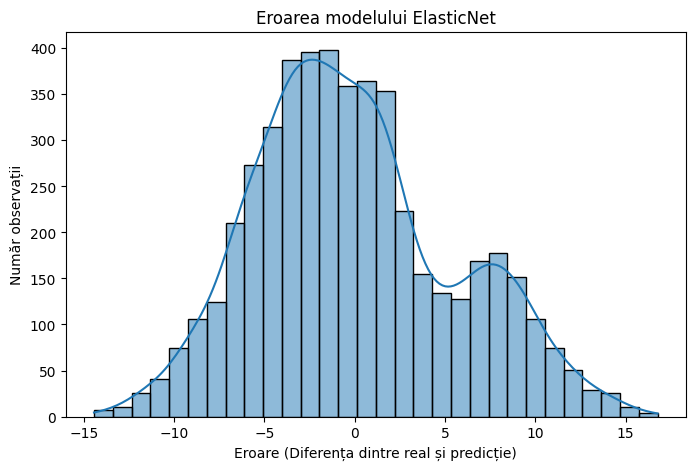

In [17]:
#Variantă nouă

best_model_name = results_df.sort_values(by="Test RMSE").iloc[0]["Model"]
best_model = models[best_model_name]
pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
pipe.fit(X_train, y_train)
y_test_pred = pipe.predict(X_test)
errors = y_test - y_test_pred

plt.figure(figsize=(8,5))
sns.histplot(errors, bins=30, kde=True)
plt.title(f"Eroarea modelului {best_model_name}")
plt.xlabel("Eroare (Diferența dintre real și predicție)")
plt.ylabel("Număr observații")
plt.show()

In [18]:
print("\nInterpretare rezultate:")
print(f"Modelul cu cel mai mic RMSE este {best_model_name} cu un RMSE de {results_df.sort_values(by='Test RMSE').iloc[0]['Test RMSE']:.4f}.")
if results_df.sort_values(by="Test RMSE").iloc[0]["Test RMSE"] > baseline_rmse:
    print("Acest model nu este mai bun decât baseline-ul, ceea ce înseamnă că ar trebui îmbunătățit.")
else:
    print("Modelul este mai bun decât baseline-ul, ceea ce sugerează că a reușit să învețe modele semnificative.")



Interpretare rezultate:
Modelul cu cel mai mic RMSE este ElasticNet cu un RMSE de 5.5624.
Modelul este mai bun decât baseline-ul, ceea ce sugerează că a reușit să învețe modele semnificative.


**Concluzie scurtă de interpretare finală**

În urma  remodificării codurilor și a modelului am ajuns la această variantă finală care mi-a generat cea mai bună potrivire pe modelul de regresie **ElasticNet**, urmat de **LinearRegression, Ridge și RandomForestRegressor** , care au performanțe similare. Aceste modele au generat erori de predicție aproape identice, ceea ce indică o performanță comparabilă asupra RMSE-ului și generalizării.

Deși **ElasticNet** a oferit cel mai bun rezultat, diferențele dintre modelele de regresie liniare și cel bazat pe **RandomForestRegressor** sunt destul de minime, ceea ce sugerează că în acest context datele nu par să necesite un model prea complex. 

În plus, din toate modelele executate se poate afirma că sunt mai optimi decât modelul baseline, care prezicea doar media valorii țintă, ceea ce arată că modelul a reușit să învețe relații semnificative între variabile.